In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_validate,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report

In [4]:
df = pd.read_csv("winequality-red.csv",sep=";");

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


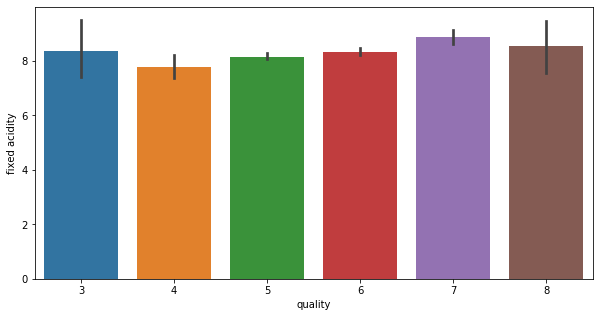

In [9]:
plt.figure(figsize=(10,5))
sns.barplot(x="quality",y="fixed acidity",data=df)

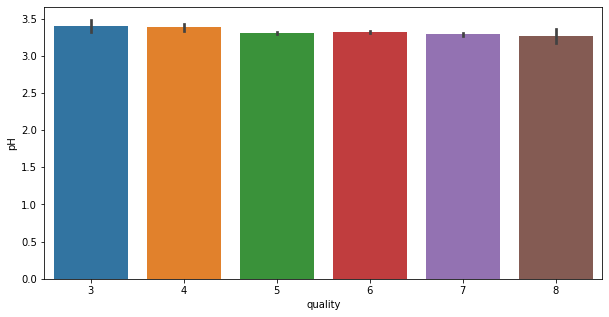

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(x="quality",y="pH",data=df)

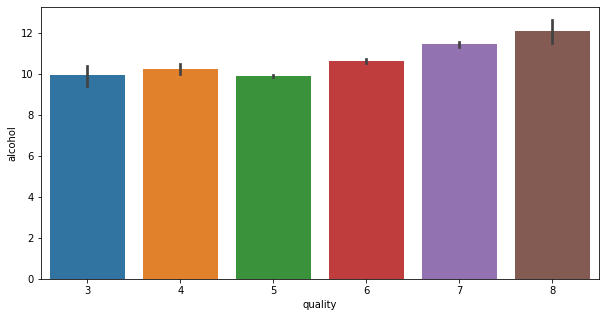

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(x='quality',y='alcohol',data=df)

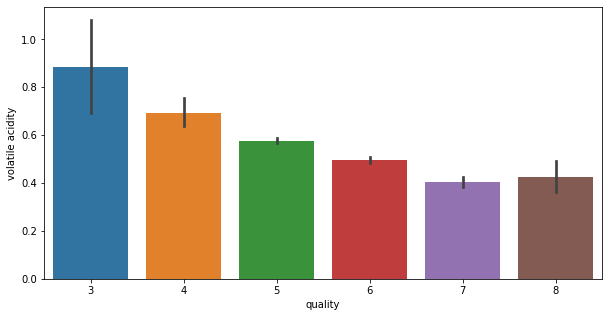

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(x='quality',y='volatile acidity',data=df)

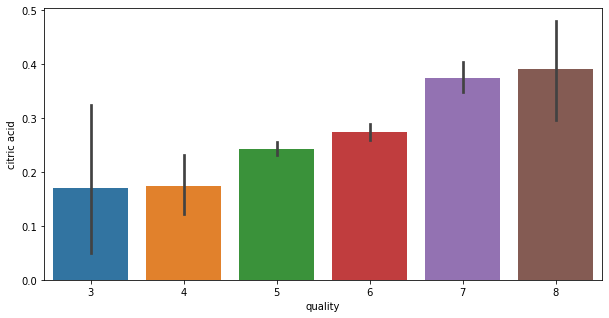

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(x='quality',y='citric acid',data=df)

In [16]:
bins = (2,6.5,8)
group_name = ['bad','good']
df['quality'] = pd.cut(df['quality'],bins=bins,labels=group_name)

In [19]:
label_quality = LabelEncoder()

In [20]:
df['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [21]:
df['quality'] = label_quality.fit_transform(df['quality'])

In [22]:
df['quality']

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int32

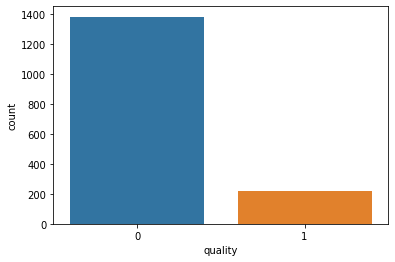

In [23]:
sns.countplot(df['quality'])

In [25]:
X = df.drop(axis=1,columns='quality')
y = df['quality']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
stand_scaler = StandardScaler()

In [31]:
X_train = stand_scaler.fit_transform(X_train) 
X_test = stand_scaler.fit_transform(X_test)

In [78]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
predict = rfc.predict(X_test)

In [80]:
confusion_matrix(y_test,predict)

array([[434,  17],
       [ 51,  26]], dtype=int64)

In [81]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       451
           1       0.60      0.34      0.43        77

    accuracy                           0.87       528
   macro avg       0.75      0.65      0.68       528
weighted avg       0.85      0.87      0.86       528



In [43]:
reg = SGDClassifier(penalty=None)
reg.fit(X_train,y_train)
predict = reg.predict(X_test)

In [44]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       451
           1       0.44      0.25      0.32        77

    accuracy                           0.84       528
   macro avg       0.66      0.60      0.61       528
weighted avg       0.82      0.84      0.83       528



In [63]:
svc = SVC()
svc.fit(X_train,y_train)
predict = reg.predict(X_test)

In [64]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       451
           1       0.68      0.35      0.46        77

    accuracy                           0.88       528
   macro avg       0.79      0.66      0.70       528
weighted avg       0.87      0.88      0.86       528



In [65]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}

In [66]:
grid_search = GridSearchCV(svc,param_grid=param,scoring='accuracy',cv=10)

In [67]:
reg =  grid_search.fit(X_train,y_train)

In [68]:
reg.best_params_

{'C': 1.3, 'gamma': 0.8, 'kernel': 'rbf'}

In [74]:
svc2 = SVC(C=1.3,gamma=0.8,kernel='rbf')
svc2.fit(X_train,y_train)
predict = svc2.predict(X_test)

In [76]:
print(classification_report(predict,y_test))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       488
           1       0.35      0.68      0.46        40

    accuracy                           0.88       528
   macro avg       0.66      0.79      0.70       528
weighted avg       0.92      0.88      0.90       528



In [84]:
rfc_eval = cross_val_score(rfc,X=X_train,y=y_train,cv=10)
rfc_eval.mean()

0.9159484250605747